***Vorlesung 'Syntax natürlicher Sprachen'***

--- 
# Intro Vorlesung 6: Feature-Based Grammars (FCFGs)

- Überproduktion  der Grammatiken aus Intro-VL-4 verhindern durch Merkmalconstraints
- Modellierung von Flexionsmorphologie

In [1]:
import nltk
from nltk import Tree

---
## 1. Feature-Modellierung von Subkategorisierung (alternativ zu IV, TV, DTV)

2


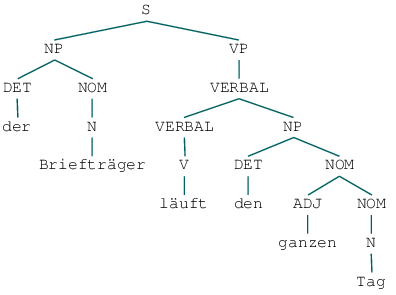

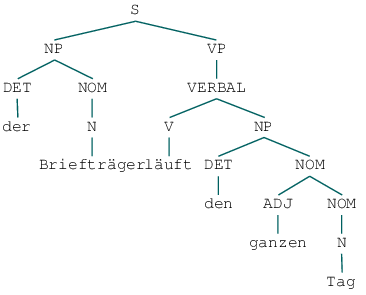

In [2]:
grammar = nltk.CFG.fromstring("""
    S   -> NP VP
    
    VP  -> VERBAL 
    VERBAL -> V NP
    VERBAL -> V NP NP
    VERBAL -> V
    VERBAL -> VERBAL NP

    NP  -> DET NOM
    NOM -> ADJ NOM
    NOM -> N    
    NOM -> N NP
 
    DET -> "der" | "den"
    N   -> "Hund" | "Briefträger" | "Stadt" | "Tag"
    ADJ -> "schreienden" | "ganzen"
    V   -> "jagt" | "läuft" | "übergibt"
""")

parser = nltk.ChartParser(grammar,trace=0)

sent = 'der Briefträger läuft den ganzen Tag'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

1


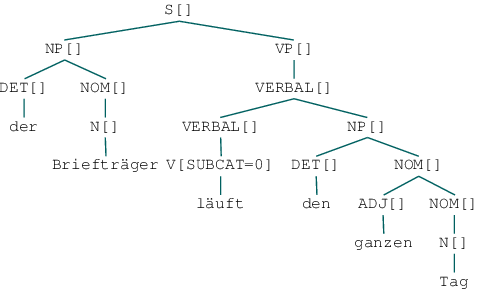

In [3]:
gramstring = r"""
% start S
    S   -> NP VP
    
    VP  -> VERBAL 
    VERBAL -> V[SUBCAT=1] NP
    VERBAL -> V[SUBCAT=2] NP NP
    VERBAL -> V[SUBCAT=0]
    VERBAL -> VERBAL NP

    NP  -> DET NOM
    NOM -> ADJ NOM
    NOM -> N    
    NOM -> N NP
 
    DET -> "der" | "den"
    N   -> "Hund" | "Briefträger" | "Stadt" | "Tag"
    ADJ -> "schreienden" | "ganzen"
    V[SUBCAT=0]   -> "läuft" 
    V[SUBCAT=1]   -> "jagt" 
    V[SUBCAT=2]   -> "übergibt"
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

sent = 'der Briefträger läuft den ganzen Tag'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)

---
## 2. Verhinderung Überproduktion durch invertierte NP - V -Regel für Auxiliarkonstruktion:

In [4]:
grammar = nltk.CFG.fromstring("""
    S   -> NP VP
    
    VP  -> VERBAL 
    VERBAL -> V NP
    VERBAL -> V NP NP
    VP -> AUX VERBAL
    VERBAL -> NP V

    NP  -> DET NOM
    NOM -> ADJ NOM
    NOM -> N
    NOM -> N NP
 
    DET -> "der" | "den"
    N   -> "Hund" | "Briefträger" | "Stadt"
    ADJ -> "schreienden"
    V   -> "jagt" | "übergibt"
    AUX -> "hat"
    V -> "übergeben"
""")

parser = nltk.ChartParser(grammar,trace=0)

sent = 'der Briefträger hat übergeben den Hund'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

1
                     S                               
     ┌───────────────┴─────────────┐                  
     │                             VP                
     │               ┌─────────────┴────┐             
     │               │                VERBAL         
     │               │      ┌───────────┴─────┐       
     NP              │      │                 NP     
 ┌───┴───────┐       │      │           ┌─────┴───┐   
 │          NOM      │      │           │        NOM 
 │           │       │      │           │         │   
DET          N      AUX     V          DET        N  
 │           │       │      │           │         │   
der     Briefträger hat übergeben      den       Hund



In [5]:
gramstring = r"""
% start S

    S   -> NP VP
    
    VP  -> VERBAL 
    VERBAL -> V[-AUX] NP
    VERBAL -> V NP NP
    VP -> AUX VERBAL
    VERBAL -> NP V[+AUX]

    NP  -> DET NOM
    NOM -> ADJ NOM
    NOM -> N
    NOM -> N NP
 
    DET -> "der" | "den"
    N   -> "Hund" | "Briefträger" | "Stadt"
    ADJ -> "schreienden"
    V[-AUX]   -> "jagt" | "übergibt"
    AUX -> "hat"
    V[+AUX] -> "übergeben"
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

In [6]:
sent = 'der Briefträger hat übergeben den Hund'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

0


In [7]:
sent = 'der Briefträger hat den Hund übergeben'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

1
                        S[]                               
       ┌─────────────────┴──────────┐                      
       │                           VP[]                   
       │                 ┌──────────┴──────┐               
       │                 │              VERBAL[]          
       │                 │          ┌──────┴─────────┐     
      NP[]               │         NP[]              │    
  ┌────┴────────┐        │     ┌────┴──────┐         │     
  │           NOM[]      │     │         NOM[]       │    
  │             │        │     │           │         │     
DET[]          N[]     AUX[] DET[]        N[]     V[+AUX] 
  │             │        │     │           │         │     
 der       Briefträger  hat   den         Hund   übergeben



In [8]:
sent = 'der Briefträger übergibt den Hund'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

1
                         S[]                       
       ┌──────────────────┴────────┐                
       │                          VP[]             
       │                           │                
       │                        VERBAL[]           
       │                  ┌────────┴──────┐         
      NP[]                │              NP[]      
  ┌────┴────────┐         │        ┌──────┴─────┐   
  │           NOM[]       │        │          NOM[]
  │             │         │        │            │   
DET[]          N[]     V[-AUX]   DET[]         N[] 
  │             │         │        │            │   
 der       Briefträger übergibt   den          Hund



In [9]:
sent = 'der Briefträger den Hund übergibt'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

0


---
## 3. Modellierung von Kasus (Variablen zum Hochreichen der Kasus-Information)

In [10]:
#Ergänzung der Features (noch ohne Constraint!):
gramstring = r"""
% start S
    S   -> NP VP
    
    VP  -> VERBAL 
    VERBAL -> V NP
    VERBAL -> V NP NP
    VERBAL -> V
    VERBAL -> VERBAL NP

    NP[CASE=?x]  -> DET[CASE=?x] NOM
    NOM -> ADJ NOM
    NOM -> N    
    NOM -> N NP
 
    DET[CASE=NOM] -> "der"
    DET[CASE=AKK] -> "den"
    N   -> "Hund" | "Briefträger"
    V   -> "rennt"

"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

sent = 'den Briefträger rennt'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

1
                                   S[]             
                      ┌─────────────┴─────────┐     
                NP[CASE='AKK']               VP[]  
       ┌──────────────┴─────────────┐         │     
       │                          NOM[]    VERBAL[]
       │                            │         │     
DET[CASE='AKK']                    N[]       V[]   
       │                            │         │     
      den                      Briefträger  rennt  



In [11]:
# mit Subjekt-Kasus-Constraint (Zeile 4):
gramstring = r"""
% start S
    S   -> NP[CASE=NOM] VP
    
    VP  -> VERBAL 
    VERBAL -> V NP
    VERBAL -> V NP NP
    VERBAL -> V
    VERBAL -> VERBAL NP

    NP[CASE=?x]  -> DET[CASE=?x] NOM
    NOM -> ADJ NOM
    NOM -> N    
    NOM -> N NP
 
    DET[CASE=NOM] -> "der"
    DET[CASE=AKK] -> "den"
    N   -> "Hund" | "Briefträger"
    V   -> "jagt" | "rennt"
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

sent = 'den Briefträger rennt'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

0


In [12]:
sent = 'der Briefträger rennt'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)

1
                                   S[]             
                      ┌─────────────┴─────────┐     
                NP[CASE='NOM']               VP[]  
       ┌──────────────┴─────────────┐         │     
       │                          NOM[]    VERBAL[]
       │                            │         │     
DET[CASE='NOM']                    N[]       V[]   
       │                            │         │     
      der                      Briefträger  rennt  

